In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from numpy.polynomial.polynomial import polyfit

In [2]:
df = pd.read_csv("jplus_sspp.txt",sep=' ')
df

,SPSPEC,RA,DEC,TEFF,LOGG,FEH,SPECTYPE,uJAVA,J0378,J0395,J0410,J0430,gSDSS,J0515,rSDSS,J0660,iSDSS,J0861,zSDSS
0,0355-51788-0064,260.550224,56.905830,6076,4.213,-1.151,F5,17.526304,17.207840,17.092297,16.758161,16.709351,16.497959,16.416205,16.138050,16.092394,15.971630,15.972558,15.942645
1,0357-51813-0372,259.215038,56.600472,8273,3.306,-2.597,A0,17.068380,16.251915,15.870674,15.644261,15.666271,15.679823,15.693857,15.739867,15.880729,15.859780,15.923202,15.923858
2,0357-51813-0411,259.740867,56.364036,8982,4.501,-3.510,WD,17.749390,17.721436,17.663353,17.519604,17.484468,17.450169,17.389662,17.615864,17.904028,17.726688,17.880241,18.034611
3,0357-51813-0550,261.044995,56.208497,5646,3.337,-2.025,F5,18.129843,17.700920,17.620277,17.401062,17.290638,17.016707,16.900097,16.544029,16.492199,16.293610,16.253666,16.225510
4,0358-51818-0039,265.047230,56.213000,8774,3.411,-2.000,A0,17.138737,16.339672,15.886298,15.780864,15.774386,15.824640,15.851254,16.013542,16.146977,16.198576,16.285614,16.259933
5,0358-51818-0156,263.848600,56.275507,8041,3.493,-2.191,A0,18.546051,17.686909,17.354002,17.146170,17.164852,17.114086,17.100376,17.123741,17.204315,17.197826,17.281902,17.242338
6,0358-51818-0277,262.237362,56.366903,5721,4.479,-1.217,G2,17.471108,17.288258,17.161781,16.844524,16.734047,16.398077,16.264748,15.911975,15.878081,15.702483,15.685789,15.634157
7,0358-51818-0518,263.326016,57.008204,6048,4.040,-1.784,F5,19.284329,18.835606,18.813152,18.524963,18.693676,18.337357,18.269838,17.958914,17.886160,17.780407,17.740013,17.762138
8,0358-51818-0522,264.092504,57.595325,6404,4.225,-1.665,F5,19.019474,18.665943,18.536802,18.377125,18.193298,18.045948,17.902924,17.715183,17.698460,17.632582,17.557308,17.597729
9,0358-51818-0538,263.792936,57.273152,7849,3.551,-2.394,A0,19.820187,19.126326,18.715618,18.520077,18.535976,18.579651,18.531429,18.504086,18.619345,18.611055,18.641758,18.530750


In [3]:
df2 = df[df.TEFF>7500]
df2

,SPSPEC,RA,DEC,TEFF,LOGG,FEH,SPECTYPE,uJAVA,J0378,J0395,J0410,J0430,gSDSS,J0515,rSDSS,J0660,iSDSS,J0861,zSDSS
1,0357-51813-0372,259.215038,56.600472,8273,3.306,-2.597,A0,17.068380,16.251915,15.870674,15.644261,15.666271,15.679823,15.693857,15.739867,15.880729,15.859780,15.923202,15.923858
2,0357-51813-0411,259.740867,56.364036,8982,4.501,-3.510,WD,17.749390,17.721436,17.663353,17.519604,17.484468,17.450169,17.389662,17.615864,17.904028,17.726688,17.880241,18.034611
4,0358-51818-0039,265.047230,56.213000,8774,3.411,-2.000,A0,17.138737,16.339672,15.886298,15.780864,15.774386,15.824640,15.851254,16.013542,16.146977,16.198576,16.285614,16.259933
5,0358-51818-0156,263.848600,56.275507,8041,3.493,-2.191,A0,18.546051,17.686909,17.354002,17.146170,17.164852,17.114086,17.100376,17.123741,17.204315,17.197826,17.281902,17.242338
9,0358-51818-0538,263.792936,57.273152,7849,3.551,-2.394,A0,19.820187,19.126326,18.715618,18.520077,18.535976,18.579651,18.531429,18.504086,18.619345,18.611055,18.641758,18.530750
10,0358-51818-0555,264.506016,56.763370,7520,4.089,-1.113,A0,19.402348,18.737839,18.453316,18.196552,18.245270,18.057793,18.007175,18.026157,18.103848,18.115112,18.170582,18.111418
11,0358-51818-0584,264.708855,57.026715,7779,4.026,-1.211,A0,17.947752,17.322285,16.955818,16.784756,16.709492,16.719286,16.684387,16.676348,16.743443,16.719650,16.762789,16.744406
12,0367-51997-0605,261.364546,56.563424,7969,4.390,-1.337,A0,19.186386,18.780720,18.335800,17.916233,17.966175,17.914108,17.929800,18.006424,18.050779,18.041815,18.167316,18.161669
15,0431-51877-0414,113.938322,38.840945,8222,4.294,-1.154,A0,18.739458,18.199085,17.845818,17.489750,17.539259,17.419884,17.486351,17.492248,17.574257,17.573921,17.572670,17.647156
16,0432-51884-0187,115.168512,39.870432,7658,3.110,-1.511,A0,17.000877,16.193214,15.867228,15.629083,15.655346,15.595911,15.558558,15.534168,15.612087,15.567967,15.589592,15.619976


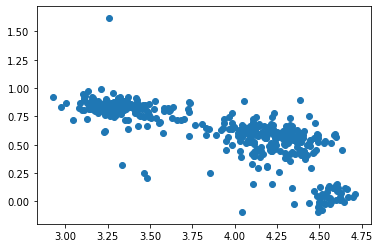

In [18]:
plt.scatter(df2.LOGG,df2.uJAVA-df2.J0378)

y= -2.0726356651621054 + 1.8256840045750355 *x + -0.2871081612182864 *x^2


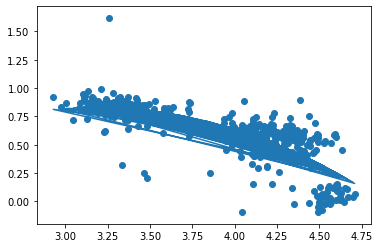

In [19]:
plt.scatter(df2.LOGG,df2.uJAVA-df2.J0378)
c,b,a = polyfit (df2.LOGG,df2.uJAVA-df2.J0378,2)
np.corrcoef(df2.LOGG,df2.uJAVA-df2.J0378)[0,1]
print("y=",c,"+",b,"*x","+",a,"*x^2")
plt.plot(df2.LOGG,c+b*df2.LOGG+a*df2.LOGG*df2.LOGG)

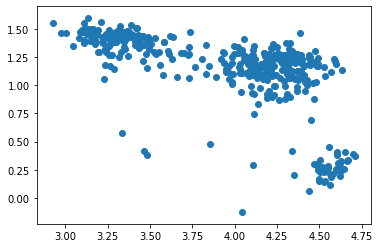

In [5]:
plt.scatter(df2.LOGG,df2.uJAVA-df2.J0410)

y= -4.635670321116746 + 3.536258276325417 *x + -0.5175766806574219 *x^2


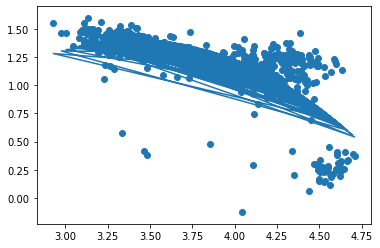

In [21]:
plt.scatter(df2.LOGG,df2.uJAVA-df2.J0410)
c,b,a = polyfit (df2.LOGG,df2.uJAVA-df2.J0410,2)
np.corrcoef(df2.LOGG,df2.uJAVA-df2.J0410)[0,1]
print("y=",c,"+",b,"*x","+",a,"*x^2")
plt.plot(df2.LOGG,c+b*df2.LOGG+a*df2.LOGG*df2.LOGG)

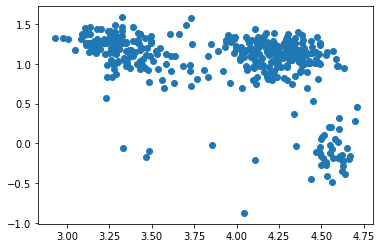

In [6]:
plt.scatter(df2.LOGG,df2.uJAVA-df2.J0660)

y= -9.238336129816556 + 5.835533107644631 *x + -0.8090626477868778 *x^2


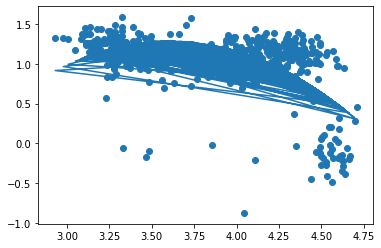

In [22]:
plt.scatter(df2.LOGG,df2.uJAVA-df2.J0660)
c,b,a = polyfit (df2.LOGG,df2.uJAVA-df2.J0660,2)
np.corrcoef(df2.LOGG,df2.uJAVA-df2.J0660)[0,1]
print("y=",c,"+",b,"*x","+",a,"*x^2")
plt.plot(df2.LOGG,c+b*df2.LOGG+a*df2.LOGG*df2.LOGG)

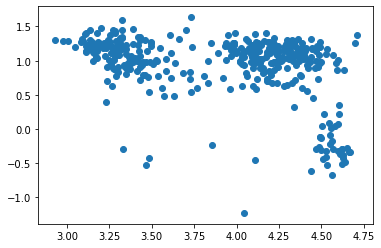

In [23]:
plt.scatter(df2.LOGG,df2.uJAVA-df2.J0861)

y= -7.781457027373684 + 4.984317746535757 *x + -0.6925453227360056 *x^2


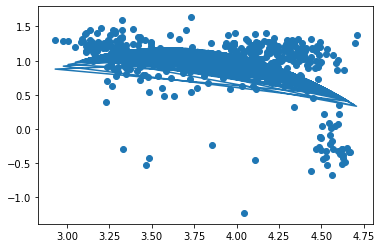

In [20]:
plt.scatter(df2.LOGG,df2.uJAVA-df2.J0861)
c,b,a = polyfit (df2.LOGG,df2.uJAVA-df2.J0861,2)
np.corrcoef(df2.LOGG,df2.uJAVA-df2.J0861)[0,1]
print("y=",c,"+",b,"*x","+",a,"*x^2")
plt.plot(df2.LOGG,c+b*df2.LOGG+a*df2.LOGG*df2.LOGG)

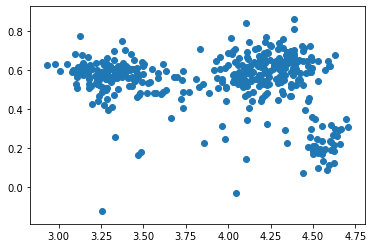

In [8]:
plt.scatter(df2.LOGG,df2.J0378-df2.J0410)

y= -2.5630346559546417 + 1.7105742717503805 *x + -0.23046851943913538 *x^2


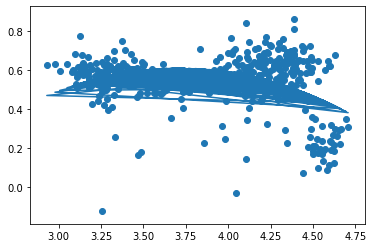

In [24]:
plt.scatter(df2.LOGG,df2.J0378-df2.J0410)
c,b,a = polyfit (df2.LOGG,df2.J0378-df2.J0410,2)
np.corrcoef(df2.LOGG,df2.J0378-df2.J0410)[0,1]
print("y=",c,"+",b,"*x","+",a,"*x^2")
plt.plot(df2.LOGG,c+b*df2.LOGG+a*df2.LOGG*df2.LOGG)

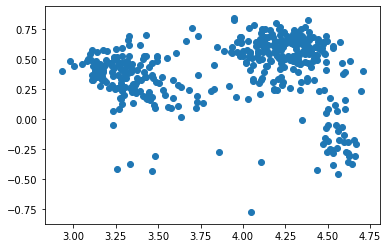

In [9]:
plt.scatter(df2.LOGG,df2.J0378-df2.J0660)

y= -7.1657004646544475 + 4.009849103069594 *x + -0.5219544865685912 *x^2


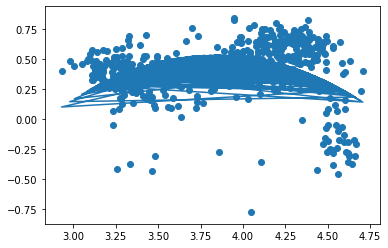

In [25]:
plt.scatter(df2.LOGG,df2.J0378-df2.J0660)
c,b,a = polyfit (df2.LOGG,df2.J0378-df2.J0660,2)
np.corrcoef(df2.LOGG,df2.J0378-df2.J0660)[0,1]
print("y=",c,"+",b,"*x","+",a,"*x^2")
plt.plot(df2.LOGG,c+b*df2.LOGG+a*df2.LOGG*df2.LOGG)

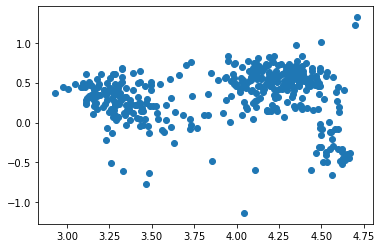

In [27]:
plt.scatter(df2.LOGG,df2.J0378-df2.J0861)

y= -5.708821362211578 + 3.1586337419607204 *x + -0.4054371615177189 *x^2


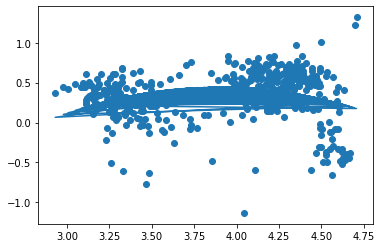

In [28]:
plt.scatter(df2.LOGG,df2.J0378-df2.J0861)
c,b,a = polyfit (df2.LOGG,df2.J0378-df2.J0861,2)
np.corrcoef(df2.LOGG,df2.J0378-df2.J0861)[0,1]
print("y=",c,"+",b,"*x","+",a,"*x^2")
plt.plot(df2.LOGG,c+b*df2.LOGG+a*df2.LOGG*df2.LOGG)

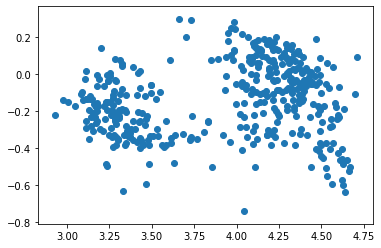

In [11]:
plt.scatter(df2.LOGG,df2.J0410-df2.J0660)

y= -4.602665808699807 + 2.299274831319214 *x + -0.2914859671294556 *x^2


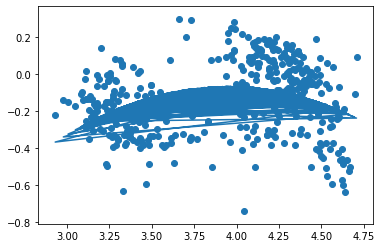

In [29]:
plt.scatter(df2.LOGG,df2.J0410-df2.J0660)
c,b,a = polyfit (df2.LOGG,df2.J0410-df2.J0660,2)
np.corrcoef(df2.LOGG,df2.J0410-df2.J0660)[0,1]
print("y=",c,"+",b,"*x","+",a,"*x^2")
plt.plot(df2.LOGG,c+b*df2.LOGG+a*df2.LOGG*df2.LOGG)

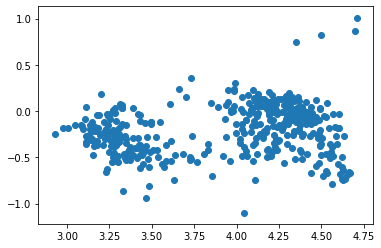

In [12]:
plt.scatter(df2.LOGG,df2.J0410-df2.J0861)

y= -3.145786706256938 + 1.448059470210341 *x + -0.1749686420785837 *x^2


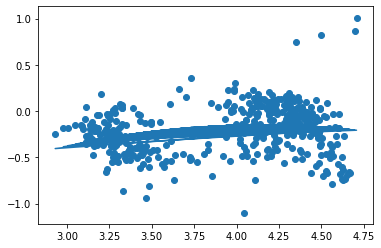

In [30]:
plt.scatter(df2.LOGG,df2.J0410-df2.J0861)
c,b,a = polyfit (df2.LOGG,df2.J0410-df2.J0861,2)
np.corrcoef(df2.LOGG,df2.J0410-df2.J0861)[0,1]
print("y=",c,"+",b,"*x","+",a,"*x^2")
plt.plot(df2.LOGG,c+b*df2.LOGG+a*df2.LOGG*df2.LOGG)

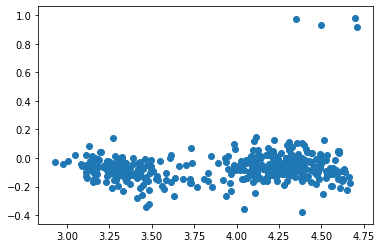

In [13]:
plt.scatter(df2.LOGG,df2.J0660-df2.J0861)

y= 1.4568791024428687 + -0.8512153611088727 *x + 0.11651732505087203 *x^2


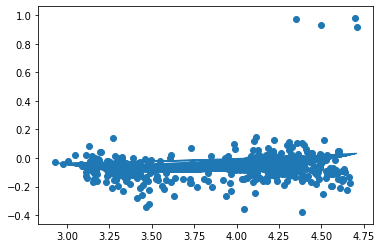

In [31]:
plt.scatter(df2.LOGG,df2.J0660-df2.J0861)
c,b,a = polyfit (df2.LOGG,df2.J0660-df2.J0861,2)
np.corrcoef(df2.LOGG,df2.J0660-df2.J0861)[0,1]
print("y=",c,"+",b,"*x","+",a,"*x^2")
plt.plot(df2.LOGG,c+b*df2.LOGG+a*df2.LOGG*df2.LOGG)